Mean Squared Error: 4.8419991659740225
R-squared (Accuracy): 0.04809898609893004


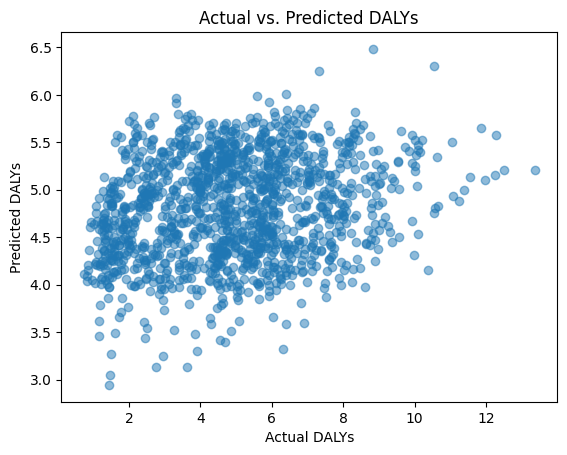

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data from the CSV file
data = pd.read_csv('mental_fitness_data.csv')

# Feature Engineering: Convert categorical features (Entity, Code) to numerical representations
label_encoder = LabelEncoder()
data['Entity'] = label_encoder.fit_transform(data['Entity'])
data['Code'] = label_encoder.fit_transform(data['Code'])

# Split the data into features (X) and target variable (y)
X = data[['Entity', 'Code', 'Year']]
# Assuming DALYs is the last column in the CSV file, use -1 as the index for the target variable
y = data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training: Use Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared (Accuracy)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (Accuracy): {r2}')

# Graphical Representation: Plot the predicted DALYs against the actual DALYs
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual DALYs')
plt.ylabel('Predicted DALYs')
plt.title('Actual vs. Predicted DALYs')
plt.show()
